In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
data= pd.read_csv('HR_comma_sep.csv')
df= data.copy()

In [3]:
df.shape

(14999, 10)

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object

In [6]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

In [7]:
df['left'].count()

14999

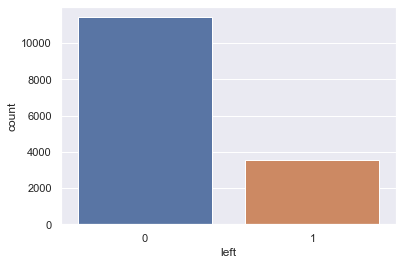

In [8]:
sns.countplot(x='left', data=df);

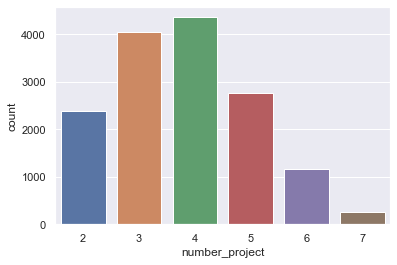

In [11]:
sns.countplot(x='number_project', data=df);

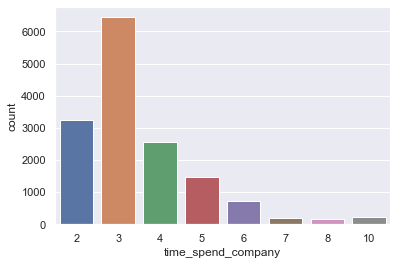

In [12]:
sns.countplot(x='time_spend_company', data=df);

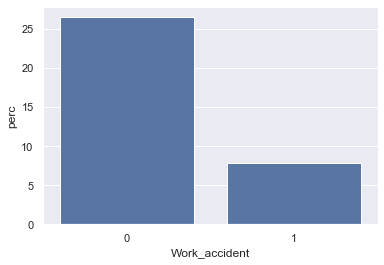

In [13]:
df_proj=df.groupby('Work_accident')['left'].value_counts(normalize=True).reset_index(name='perc')
df_proj['perc']=df_proj['perc']*100
sns.barplot(x='Work_accident', y='perc', data=df_proj[df_proj['left']==1], color='b')

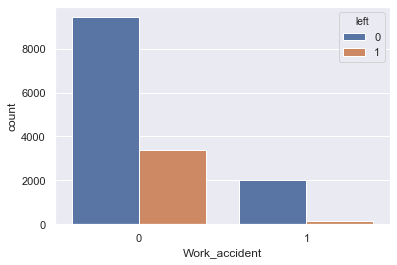

In [14]:
sns.countplot(x='Work_accident',hue='left', data=df);

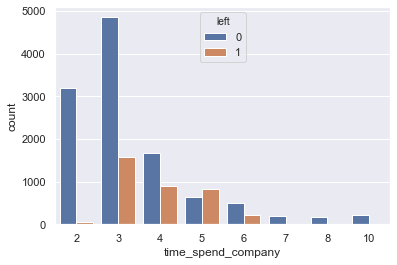

In [15]:
sns.countplot(x='time_spend_company',hue='left',data=df);

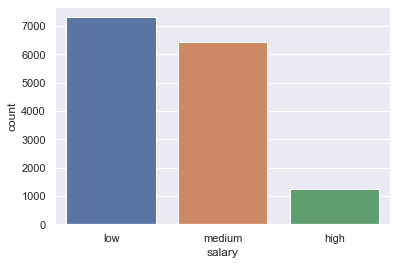

In [16]:
sns.countplot(x='salary', data=df);

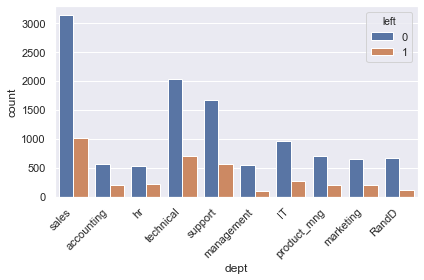

In [17]:
a=sns.countplot(x='dept',hue='left', data=df);
a.set_xticklabels(a.get_xticklabels(), rotation=45,ha='right')
plt.tight_layout()
plt.show()

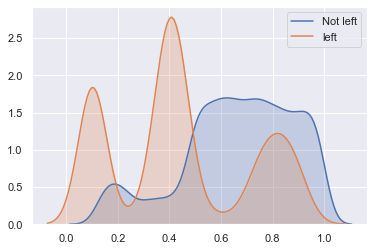

In [18]:
sns.kdeplot(df[df['left']==0]['satisfaction_level'].dropna(),shade=True,label='Not left');
sns.kdeplot(df[df['left']==1]['satisfaction_level'].dropna(),shade=True,label='left');
    

In [19]:
df['satisfaction_level_type'] = ''
df.loc[ df['satisfaction_level'] >= 0.5, 'satisfaction_level_type']='High'
df.loc[ df['satisfaction_level'] <0.5, 'satisfaction_level_type']='Low'
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,satisfaction_level_type
0,0.38,0.53,2,157,3,0,1,0,sales,low,Low
1,0.80,0.86,5,262,6,0,1,0,sales,medium,High
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Low
3,0.72,0.87,5,223,5,0,1,0,sales,low,High
4,0.37,0.52,2,159,3,0,1,0,sales,low,Low


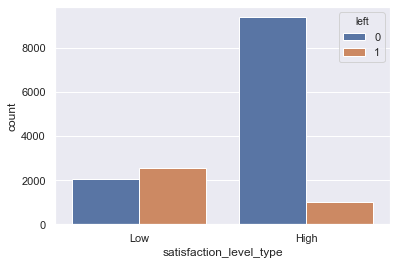

In [20]:
sns.countplot(x='satisfaction_level_type',hue='left', data=df);

In [21]:
df['employee_type']=''
df.loc[ df['number_project'] ==2,'employee_type'] = 'unburdened'
df.loc[(df['number_project'] >=3) & (df['number_project'] <=5), 'employee_type'] = 'Satisfactory'
df.loc[ df['number_project'] >=6, 'employee_type'] =  'Burdened'
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,satisfaction_level_type,employee_type
0,0.38,0.53,2,157,3,0,1,0,sales,low,Low,unburdened
1,0.80,0.86,5,262,6,0,1,0,sales,medium,High,Satisfactory
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Low,Burdened
3,0.72,0.87,5,223,5,0,1,0,sales,low,High,Satisfactory
4,0.37,0.52,2,159,3,0,1,0,sales,low,Low,unburdened


In [22]:
df['employee_type'].value_counts()

Satisfactory    11181
unburdened       2388
Burdened         1430
Name: employee_type, dtype: int64

In [23]:
df_OneHot=pd.get_dummies(df,columns=['dept','salary','satisfaction_level_type','employee_type'])
df_OneHot.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_IT,dept_RandD,...,dept_support,dept_technical,salary_high,salary_low,salary_medium,satisfaction_level_type_High,satisfaction_level_type_Low,employee_type_Burdened,employee_type_Satisfactory,employee_type_unburdened
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [24]:
df=df_OneHot.copy()

In [25]:
df.shape

(14999, 26)

In [26]:
X=df.drop(['left'], axis=1)
Y=df['left']
print(X.shape)
print(Y.shape)

(14999, 25)
(14999,)


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
xtrain, xtest, ytrain, ytest= train_test_split(X, Y, test_size=0.3,random_state=100)
print(xtrain.shape, ytrain.shape)
print(xtest.shape,ytest.shape)

(10499, 25) (10499,)
(4500, 25) (4500,)


In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
clf_rf = RandomForestClassifier(random_state=100)

In [31]:
clf_rf.fit(xtrain, ytrain)

C:\Users\furqa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [32]:
rf_pred= clf_rf.predict(xtest)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
rf_acc = accuracy_score(ytest,rf_pred)
rf_acc

0.9897777777777778

In [35]:
from sklearn.metrics import precision_score

In [36]:
rf_precion=precision_score(ytest,rf_pred)
rf_precion

0.9925163704396632